In [24]:
### 모듈로딩
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
from torchinfo import summary

In [19]:
### 데이터 준비
filename = '../data/img/6ce3ad01e28379b5503e1383dbb72acf.jpg'

In [20]:
imgNP = cv2.imread(filename) / 255.
imgNP2 = cv2.resize(imgNP, (50,50))
print(imgNP.shape, imgNP.ndim, '-------->',imgNP2.shape, imgNP2.ndim)

# Gray 이미지
grayNP = cv2.imread(filename, cv2.IMREAD_GRAYSCALE) / 255.
grayNP2 = cv2.resize(grayNP, (50,50))
print(grayNP.shape, grayNP.ndim , '-------->',grayNP2.shape, grayNP2.ndim)

(421, 750, 3) 3 --------> (50, 50, 3) 3
(421, 750) 2 --------> (50, 50) 2


In [21]:
### numpy -> FloaTensor 변환
colorT = torch.FloatTensor(imgNP2)
grayT = torch.FloatTensor(grayNP2)

In [22]:
# 채널의 위치를 앞으로 변경해야 함
print( f'[ColorT] shape : {colorT.shape} ndim : {colorT.ndim}D')
print( f'[GrayT] shape : {grayT.shape} ndim : {grayT.ndim}D')

[ColorT] shape : torch.Size([50, 50, 3]) ndim : 3D
[GrayT] shape : torch.Size([50, 50]) ndim : 2D


In [23]:
# Pytorch 이미지 데이터 형식 ( C, H, W )
colorT = colorT.permute(2,0,1)
grayT.unsqueeze_(0)  # _ -> 바로 적용

print( f'[ColorT] shape : {colorT.shape} ndim : {colorT.ndim}D')
print( f'[GrayT] shape : {grayT.shape} ndim : {grayT.ndim}D')

[ColorT] shape : torch.Size([3, 50, 50]) ndim : 3D
[GrayT] shape : torch.Size([1, 50, 50]) ndim : 3D


### ===> CNN Layer 살펴보기

In [37]:
### ===> 이미지 데이터로 Conv2d
### [1] 흑백이미지
conLayer = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=(3,3), stride=1, padding = 0) # 입력 출력 shape 다름
# padding = 0이니까 줄어듦 -> 48 * 48 -> 반환값 : ( out_channels, 48, 48 )
# kernel_size가 ( 3, 3 )이기때문에 48번째 줄까지 읽을 수 있어서 크기가 2(3-1)만큼 줄어듦
# kernel_size - 1 만큼 줄어듦
# stride = 2 -> 두칸씩 뛰기 때문에 반환값 : ( out_channels, 24, 24 )
conLayer2 = nn.Conv2d(in_channels=5, out_channels=3, kernel_size=(3,3), stride=1, padding = 1) # 입력 출력 shape 같음
# padding = 0이면 줄어듦 -> 46 * 46 -> 반환값 : ( out_channels, 46, 46 )
# same padding을 위해서 kernel_size가 3일때는 padding = 1/ kernel_size가 5일때는 padding = 2
conLayer2

Conv2d(5, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [38]:
output = conLayer(grayT)  # 한 장이면 채널 수 생략 가능
output2 = conLayer2(output)

print(f'[output] : {output.shape} [output2] : {output2.shape}')  # [1, 48, 48] -> 맨 앞은 커널의 수 / 맨 앞 shape = out_channels의 값


[output] : torch.Size([5, 48, 48]) [output2] : torch.Size([3, 48, 48])


In [40]:
### ===> Polling Layer : Conv층에서 추출한 특징을 다운샘플링 진행
### 결과 : shape : H, W 줄어듦, C는 그대로
pol1 = nn.MaxPool2d(kernel_size=3)
pol2 = nn.MaxPool2d(kernel_size=3, stride=2) # 이렇게 하면 한칸이 겹침

In [39]:
### convXD + AF => F.relu()
relu1 = F.relu(input = output)

relu2 = F.relu(input = conLayer2(relu1))
relu2.shape

torch.Size([3, 48, 48])

In [44]:
# 2번째 Conv2D+AF 결과인 피쳐맵 전달
fm1 = pol1(relu2)
fm2 = pol2(relu2)
fm1.shape, fm2.shape

(torch.Size([3, 16, 16]), torch.Size([3, 23, 23]))

In [49]:
fm1.reshape(-1,fm1.shape[0]*fm1.shape[1]*fm1.shape[2])

tensor([[0.3212, 0.2399, 0.2393, 0.2227, 0.2590, 0.2310, 0.2444, 0.2566, 0.2510,
         0.2822, 0.2617, 0.2593, 0.2593, 0.2593, 0.2593, 0.3135, 0.3214, 0.2428,
         0.2782, 0.2338, 0.2335, 0.2485, 0.2470, 0.2446, 0.2917, 0.3149, 0.3155,
         0.3129, 0.3095, 0.3099, 0.3103, 0.3457, 0.3819, 0.2579, 0.2737, 0.2847,
         0.2732, 0.2751, 0.2519, 0.2514, 0.2697, 0.1985, 0.2135, 0.2150, 0.2129,
         0.2138, 0.2143, 0.2877, 0.3129, 0.2414, 0.2614, 0.3209, 0.3144, 0.2746,
         0.2669, 0.2520, 0.2824, 0.1885, 0.1782, 0.1782, 0.1782, 0.1782, 0.1782,
         0.2347, 0.2473, 0.1699, 0.1708, 0.3061, 0.3004, 0.3104, 0.2977, 0.2758,
         0.2806, 0.1871, 0.1782, 0.1782, 0.1782, 0.1782, 0.1782, 0.2347, 0.3471,
         0.2379, 0.2365, 0.3320, 0.3329, 0.3226, 0.2681, 0.2769, 0.3042, 0.2162,
         0.1782, 0.1782, 0.1782, 0.1782, 0.1782, 0.2347, 0.2172, 0.2191, 0.2262,
         0.2938, 0.3120, 0.2962, 0.2519, 0.2773, 0.2721, 0.1993, 0.1782, 0.1782,
         0.1842, 0.1872, 0.1

In [48]:
fm2.reshape(-1,fm2.shape[0]*fm2.shape[1]*fm2.shape[2])

tensor([[0.3212, 0.2137, 0.2399,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<ViewBackward0>)

In [50]:
# 구성 : Conv2D + Conv2D + Pooling
print('grayT : ', grayT.shape)    # torch.Size([1, 50, 50])

con_Layer_k5_1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=5, stride=1, padding=0)
output1 = F.relu(con_Layer_k5_1(grayT))    # torch.Size([5, 46, 46]) : in=1, out=5, kernel=5, stride=1, padding=0
print('relu1 : ', output1.shape)

con_Layer_k5_2 = nn.Conv2d(in_channels=5, out_channels=3, kernel_size=5, stride=1, padding=0)
output2 = F.relu(con_Layer_k5_2(output1))     # torch.Size([3, 42, 42]) : in=5, out=3, kernel=5, stride=1, padding=0
print('relu2 : ', output2.shape)

mp1 = pol1(output2)       # torch.Size([3, 14, 14]) : kernel=3, stride=None
print('mp1 : ', mp1.shape)

grayT :  torch.Size([1, 50, 50])
relu1 :  torch.Size([5, 46, 46])
relu2 :  torch.Size([3, 42, 42])
mp1 :  torch.Size([3, 14, 14])


torch.Size([50, 50])


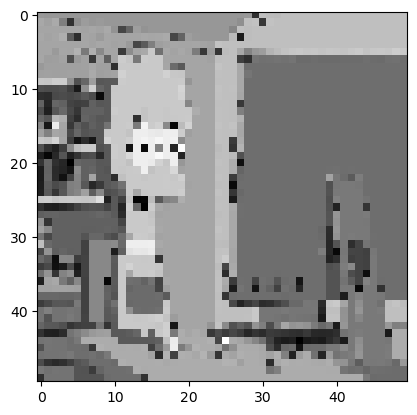

In [51]:
# 시각화
import matplotlib.pyplot as plt

# 3D -> 2D
gray_img = grayT.squeeze(0)
print(gray_img.shape)

# .imshow()
plt.imshow(gray_img, cmap='gray')
plt.show()

torch.Size([46, 46])


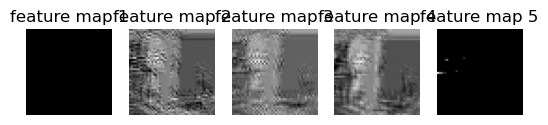

=> conv2d(1, 5, 5, 1, 0) + relu
torch.Size([42, 42])


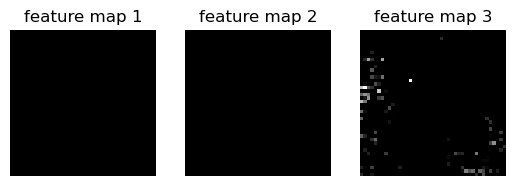

=> conv2d(5, 3, 5, 1, 0) + relu


In [52]:
# 첫 번째 Conv2D Layer 추출 피처맵
def feature_plot(fmap):
    for idx in range(fmap.shape[0]):
        if idx == 0:
            print(fmap[idx].shape)
        plt.subplot(1, fmap.shape[0], idx+1)
        plt.imshow(fmap[idx].detach().numpy(), cmap='gray')  # .detach() : gradient 계산 없는 tensor로 변환
        plt.title(f'feature map {idx+1}')
        plt.axis('off')
    plt.show()

feature_plot(output1)
print('=> conv2d(1, 5, 5, 1, 0) + relu')
feature_plot(output2)
print('=> conv2d(5, 3, 5, 1, 0) + relu')